In [6]:
# memanggil modul yang diperlukan
import cv2
import numpy as np
from matplotlib import pyplot as plt


In [9]:
#membaca gambar yang disimpan pada file
tootles = cv2.imread('tooth.jpg')
tootles = cv2.cvtColor(tootles, cv2.COLOR_BGR2RGB)#membaca gambar sebelumnya lalu diubah ke format rgb
#membuat filter: matriks berukuran 5 x 5 
kernel = np.ones((5,5),np.float32)/25
print(kernel)

# lakukan filtering
tootles_filter = cv2.filter2D(tootles,-1,kernel)

cv2.imshow('Tootles', tootles)#menampilkan gambar asli 
cv2.imshow('Tootles_Filter', tootles_filter)#menampilkan gambar hasil filtering
cv2.waitKey(0)
cv2.destroyAllWindows()

[[0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]]


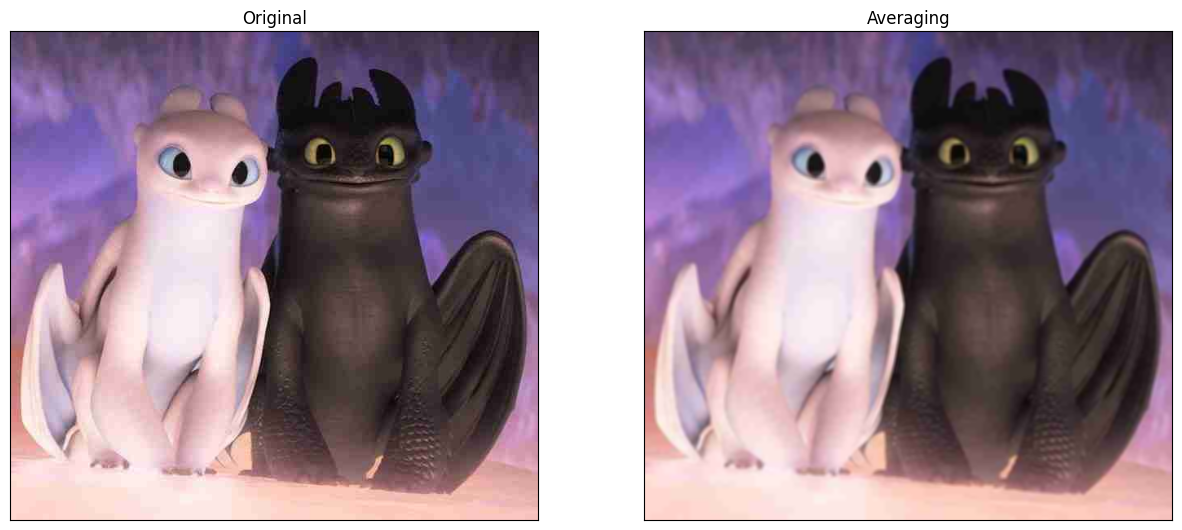

In [10]:
# perbesar ukuran hasil plotting jika diperlukan
plt.rcParams["figure.figsize"] = (15,15)

# plot pertama, gambar asli
plt.subplot(121),plt.imshow(tootles),plt.title('Original')
plt.xticks([]), plt.yticks([])

# plot kedua, hasil filter
plt.subplot(122),plt.imshow(tootles_filter),
plt.title('Averaging')
plt.xticks([]), plt.yticks([])

# Plot semua dan tampilkan
plt.show()

In [11]:
tootles_blur = cv2.blur(tootles,(5,5))#melakukan filtering blur pada gambar
# menampilkan gambar hasil filtering
cv2.imshow('Tootles_Blur', tootles_blur)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [13]:
#cara lain untuk membuat sebuah kernel yaitu dengan menggunakan np.matrix berukuran 3 x 3
kernel = np.matrix([
          [1, 1, 1],
          [1, 2, 1],
          [1, 1, 1]         
          ])/25
print(kernel)

# melakukan filtering 
Tootles_filter = cv2.filter2D(tootles,-1,kernel)

# menampilkan gambar hasil filtering
cv2.imshow('Tootles_Filter', Tootles_filter)
cv2.waitKey(0)
cv2.destroyAllWindows()

[[0.04 0.04 0.04]
 [0.04 0.08 0.04]
 [0.04 0.04 0.04]]
